# IMPORT LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# LOAD DATASET

In [2]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df=pd.read_csv('Titanic.csv')
df_data = pd.read_csv("tested.csv")
df.shape

(418, 12)

# INFORMATION ABOUT OUR DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

# VISUALIZATION OF DATA

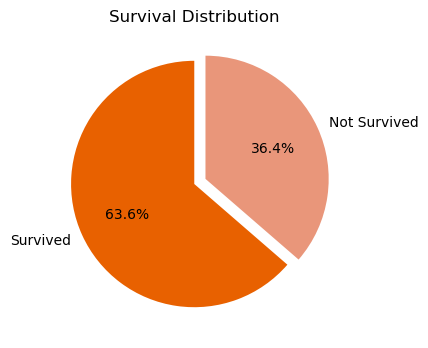

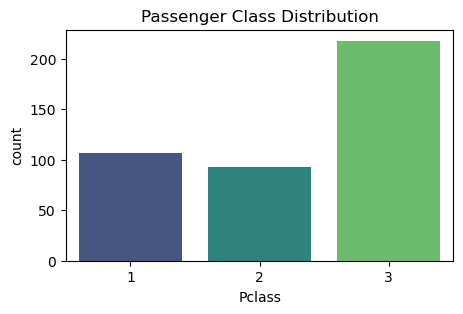

In [6]:
# Step 4: Visualize the data
df= pd.read_csv("Titanic.csv")

# Pie chart for Survival Distribution
survival_counts = df['Survived'].value_counts()
plt.figure(figsize=(5,4))
plt.pie(survival_counts, labels=['Survived','Not Survived'],autopct='%1.1f%%',startangle=90,explode=[0,0.1] ,colors=['#e86100','#e9967a'])
plt.title('Survival Distribution')
plt.show()

survival_counts = df['Survived'].value_counts()
plt.figure(figsize=(5,3))
sns.countplot(x='Pclass',data=df,palette='viridis')
plt.title('Passenger Class Distribution')
plt.show()

# DROP THE COLUMNS

In [7]:
#drop unncessary tables
df = df.drop(['Ticket'], axis=1) 
df_data= df_data.drop(['Ticket'], axis=1)
df = df.drop(['Cabin'], axis=1) 
df_data= df_data.drop(['Cabin'], axis=1)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [9]:
# replacing the missing values in  
# the Embarked feature with S 
df = df.fillna({"Embarked": "S"}) 

In [10]:
# sort the ages into logical categories 
df["Age"] = df["Age"].fillna(-0.5) 
df_data["Age"] = df_data["Age"].fillna(-0.5) 
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
          'Student', 'Young Adult', 'Adult', 'Senior'] 
df['AgeGroup'] = pd.cut(df["Age"], bins, labels=labels) 
df_data['AgeGroup'] = pd.cut(df_data["Age"], bins, labels=labels)

In [11]:

# create a combined group of both datasets 
combine = [df, df_data] 
  
# extract a title for each Name in the  
# train and test datasets 
for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
  
pd.crosstab(df['Title'], df['Sex']) 
  
# replace various titles with more common names 
for dataset in combine: 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Jonkheer', 'Dona'], 
                                                'Rare') 
  
    dataset['Title'] = dataset['Title'].replace( 
        ['Countess', 'Lady', 'Sir'], 'Royal') 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 
  
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 
  
# map each of the title groups to a numerical value 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Royal": 5, "Rare": 6} 
for dataset in combine: 
    dataset['Title'] = dataset['Title'].map(title_mapping) 
    dataset['Title'] = dataset['Title'].fillna(0) 

In [12]:
mr_age = df[df["Title"] == 1]["AgeGroup"].mode()  # Young Adult 
miss_age = df[df["Title"] == 2]["AgeGroup"].mode()  # Student 
mrs_age = df[df["Title"] == 3]["AgeGroup"].mode()  # Adult 
master_age = df[df["Title"] == 4]["AgeGroup"].mode()  # Baby 
royal_age = df[df["Title"] == 5]["AgeGroup"].mode()  # Adult 
rare_age = df[df["Title"] == 6]["AgeGroup"].mode()  # Adult 
  
age_title_mapping = {1: "Young Adult", 2: "Student", 
                     3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"} 
  
for x in range(len(df["AgeGroup"])): 
    if df["AgeGroup"][x] == "Unknown": 
        df["AgeGroup"][x] = age_title_mapping[df["Title"][x]] 
  
for x in range(len(df_data["AgeGroup"])): 
    if df_data["AgeGroup"][x] == "Unknown": 
        df_data["AgeGroup"][x] = age_title_mapping[df_data["Title"][x]] 

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Young Adult,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adult,3
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Senior,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Young Adult,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Student,3


In [14]:

# map each Age value to a numerical value 
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
               'Student': 4, 'Young Adult': 5, 'Adult': 6,  
               'Senior': 7} 
df['AgeGroup'] = df['AgeGroup'].map(age_mapping) 
df_data['AgeGroup'] = df_data['AgeGroup'].map(age_mapping) 
  
df.head() 
  
# dropping the Age feature for now, might change 
df = df.drop(['Age'], axis=1) 
df_data = df_data.drop(['Age'], axis=1) 

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,892,0,3,"Kelly, Mr. James",male,0,0,7.8292,Q,5.0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,6.0,3
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,7.0,1
3,895,0,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,5.0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,4.0,3


In [16]:
df = df.drop(['Name'], axis=1) 
df_data = df_data.drop(['Name'], axis=1)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,892,0,3,male,0,0,7.8292,Q,5.0,1
1,893,1,3,female,1,0,7.0000,S,6.0,3
2,894,0,2,male,0,0,9.6875,Q,7.0,1
3,895,0,3,male,0,0,8.6625,S,5.0,1
4,896,1,3,female,1,1,12.2875,S,4.0,3


# INSERTED SOME COLUMNS AND CHANGE THE DATA

In [18]:
sex_mapping = {"male": 0, "female": 1} 
df['Sex'] = df['Sex'].map(sex_mapping) 
df_data['Sex'] = df_data['Sex'].map(sex_mapping) 
  
embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
df['Embarked'] = df['Embarked'].map(embarked_mapping) 
df_data['Embarked'] = df_data['Embarked'].map(embarked_mapping) 

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,892,0,3,0,0,0,7.8292,3,5.0,1
1,893,1,3,1,1,0,7.0000,1,6.0,3
2,894,0,2,0,0,0,9.6875,3,7.0,1
3,895,0,3,0,0,0,8.6625,1,5.0,1
4,896,1,3,1,1,1,12.2875,1,4.0,3


In [20]:
for x in range(len(df_data["Fare"])): 
    if pd.isnull(df_data["Fare"][x]): 
        pclass = df_data["Pclass"][x]  # Pclass = 3 
        df_data["Fare"][x] = round( 
            df[df["Pclass"] == pclass]["Fare"].mean(), 4) 
  
# map Fare values into groups of  
# numerical values 
df['Fare'] = pd.qcut(df['Fare'], 4,  
                            labels=[1, 2, 3, 4]) 
df_data['Fare'] = pd.qcut(df_data['Fare'], 4,  
                           labels=[1, 2, 3, 4]) 

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,892,0,3,0,0,0,1,3,5.0,1
1,893,1,3,1,1,0,1,1,6.0,3
2,894,0,2,0,0,0,2,3,7.0,1
3,895,0,3,0,0,0,2,1,5.0,1
4,896,1,3,1,1,1,2,1,4.0,3


In [22]:
# replacing the missing values in  
# the Embarked feature with S 
df = df.fillna({"Embarked": "S"}) 

# MODEL TRAINING

In [31]:
from sklearn.tree import DecisionTreeClassifier
randomforest = DecisionTreeClassifier()
randomforest.fit(X_train,y_train)
y_pred = randomforest.predict(X_test)

In [32]:
y_train_predict = randomforest.predict(X_train)
y_train_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [37]:
from sklearn.model_selection import train_test_split 

# Drop the Survived and PassengerId 
# column from the trainset 
X= df.drop(['Survived', 'PassengerId'], axis=1) 
y = df["Survived"] 
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=0) 


In [38]:
from sklearn.ensemble import RandomForestClassifier 
# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 

In [39]:
from sklearn.metrics import accuracy_score 

# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest)

100.0


In [ ]:
X